Họ tên: Phạm Viết Xuân

MSSV: 18120658

# HW2: Cách thực thi song song trong CUDA

Với các GPU tương đối mới thì để biên dịch chỉ cần dùng câu lệnh: \
`nvcc tên-file.cu -o tên-file-chạy`

Nhưng trên Colab mình thường lấy được GPU khá cũ là Tesla K80 với compute capability (phiên bản phần cứng) là 3.7; để biên dịch đúng với GPU khá cũ này thì bạn cần dùng câu lệnh: \
`nvcc -arch=sm_37 tên-file.cu -o tên-file-chạy` \
Trong đó, 37 chính là compute capability của GPU Tesla K80.

Để phòng trường hợp khi làm bài bạn lấy được GPU có compute capability x.x nhưng khi chấm bài Thầy lại lấy được GPU có compute capability khác x.x, dưới đây mình sẽ có đoạn code Python để tự động lấy 2 con số ứng với compute capability của GPU và lưu vào 2 biến `major` và `minor`:


In [1]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 3.7


Một khi đã chạy đoạn code Python ở trên, để biên dịch thì bạn sẽ dùng câu lệnh: \
`nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy`

Dưới đây, khi làm bài thì bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell có chữ của Thầy là được.

## Câu 1A

In [2]:
!nvcc -arch=sm_37 HW2_P1.cu -o HW2_P1

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [3]:

!./HW2_P1 

**********GPU info**********
Name: Tesla K80
Compute capability: 3.7
Num SMs: 13
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 11996954624 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 5.976096 ms, post-kernel time = 0.094176 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 6.628928 ms, post-kernel time = 0.058784 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 3.216800 ms, post-kernel time = 0.059808 ms
CORRECT :)



## Nhận xét
- Kernel 2 có thời gian thực thi lâu hơn kernel 1 khoảng 1 giây
- Riêng hàm kernel 3 thì thời gian chạy giảm xuống 1 khoảng gần 1 nửa.

## Lý do:
* Kernel 2 thực thi lâu hơn kernel 1 vì tuy nó giảm được số warp bị phân kì nhưng nó lại sử dụng nhiều phép nhân hơn, việc nhiều phép nhân khiến kernel chạy chậm hơn mặc dù nó có ít warp bị phân kì hơn.
* Kernel 3 có thời gian tối ưu hơn bởi vì nó có ít warp bị phân kì nhất.

## Câu 1B


In [4]:
# blockSize = 128
!./HW2_P1 128 

**********GPU info**********
Name: Tesla K80
Compute capability: 3.7
Num SMs: 13
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 11996954624 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 65537, block size: 128
Kernel time = 3.978528 ms, post-kernel time = 0.201024 ms
CORRECT :)

Kernel 2
Grid size: 65537, block size: 128
Kernel time = 4.326048 ms, post-kernel time = 0.209376 ms
CORRECT :)

Kernel 3
Grid size: 65537, block size: 128
Kernel time = 2.443456 ms, post-kernel time = 0.202048 ms
CORRECT :)


In [5]:
# blockSize = 256
!./HW2_P1 256

**********GPU info**********
Name: Tesla K80
Compute capability: 3.7
Num SMs: 13
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 11996954624 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 32769, block size: 256
Kernel time = 4.707456 ms, post-kernel time = 0.120192 ms
CORRECT :)

Kernel 2
Grid size: 32769, block size: 256
Kernel time = 5.315424 ms, post-kernel time = 0.109760 ms
CORRECT :)

Kernel 3
Grid size: 32769, block size: 256
Kernel time = 2.768192 ms, post-kernel time = 0.127072 ms
CORRECT :)


In [6]:
# blockSize = 512
!./HW2_P1 512

**********GPU info**********
Name: Tesla K80
Compute capability: 3.7
Num SMs: 13
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 11996954624 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 5.947808 ms, post-kernel time = 0.089536 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 6.612544 ms, post-kernel time = 0.076256 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 3.218496 ms, post-kernel time = 0.060000 ms
CORRECT :)


In [7]:
# blockSize = 1024
!./HW2_P1 1024

**********GPU info**********
Name: Tesla K80
Compute capability: 3.7
Num SMs: 13
Max num threads per SM: 2048
Max num warps per SM: 64
GMEM: 11996954624 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 8193, block size: 1024
Kernel time = 7.790720 ms, post-kernel time = 0.051040 ms
CORRECT :)

Kernel 2
Grid size: 8193, block size: 1024
Kernel time = 8.620512 ms, post-kernel time = 0.049920 ms
CORRECT :)

Kernel 3
Grid size: 8193, block size: 1024
Kernel time = 4.182240 ms, post-kernel time = 0.037120 ms
CORRECT :)


Block size | Grid size | Num blocks / SM | Occupancy (%) | Kernel time (ms) | Post-kernel time (ms) | Total time (ms)
--- | --- | --- | --- | --- | --- | ---
1024 | 8193 | 2 | 100 | 7.612160  | 0.034400  | 7.64656
512 | 16385 | 4 | 100 | 5.812192  | 0.057184  | 5.869376
256 | 65537 | 8 | 100| 4.580064  | 0.111328 | 4.691392
128 | 32769 | 16 | 100 | 3.891680  | 0.217888  | 4.109568


## Cách tính Num blocks /SM: 


Num blocks / SM = (Max num threads / SM)/ (Threads / Block)
### Mà:
* *Max num threads / SM* = 2048( tra trong bảng)
* *Max num threads / Block* = blockSize

## Cách tính Occupancy
 
Occupancy =  ((blockSize / (Threads / Warp) ) * Num blocks / SM) / (Max num warps / SM)
 ### Mà:
Threads / Warp = (Max num threads / SM) / (Max num warps / SM) = 2048 / 64 = 32
### Nên
Occupancy =  ((blockSize / 32 ) * Num blocks / SM) / (Max num warps / SM)

## Ví dụ: 
Với blockSize = 1024
Num blocks / SM  = 2048/1024 = 2
Occupancy = ((1024 / 32)* 2) / 64 = 1 = 100%

Từ bảng trên,ta có thể thấy khi giảm `blockSize` thì `Kernel time` giảm còn `Post-kernel time` tăng

- `Kernel time` là thời gian tính toán song song. Khi `blockSize` nhỏ dần thì số lần thay đổi giá trị của biến `stride` trong các vòng for giảm dần, vì thế nên thời gian thực thi cũng giảm.

- `Post-kernel time` là thời gian host duyệt qua mảng `out` có kích thước `gridSize` để thực hiện phép cộng. Khi `blockSize` giảm thì `gridSize` sẽ tăng nên duyệt sẽ lâu hơn dẫn đến thời gian tăng.

## Câu 2

In [8]:
!nvcc -arch=sm_37 HW2_P2.cu -o HW2_P2
!./HW2_P2

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
n =  16777217

GPU name: Tesla K80
GPU compute capability: 3.7
Processing time of all device streams: 29.429760 ms

CORRECT :)


In [9]:
!./HW2_P2 512 1

n =  16777217

GPU name: Tesla K80
GPU compute capability: 3.7
Processing time of all device streams: 29.228544 ms

CORRECT :)


In [10]:
!./HW2_P2 512 3

n =  16777217

GPU name: Tesla K80
GPU compute capability: 3.7
Processing time of all device streams: 22.746752 ms

CORRECT :)


In [11]:
!nvprof ./HW2_P2 512 1

n =  16777217

==251== NVPROF is profiling process 251, command: ./HW2_P2 512 1
GPU name: Tesla K80
GPU compute capability: 3.7
==251== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Processing time of all device streams: 29.675615 ms

CORRECT :)
==251== Profiling application: ./HW2_P2 512 1
==251== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   65.59%  19.398ms         2  9.6989ms  9.5956ms  9.8022ms  [CUDA memcpy HtoD]
                   28.93%  8.5565ms         1  8.5565ms  8.5565ms  8.5565ms  [CUDA memcpy DtoH]
                    5.47%  1.6183ms         1  1.6183ms  1.6183ms  1.6183ms  addVecKernel(int*, int*, int, int*)
      API calls:   81.86%  295.62ms         3  98.540ms  3.7331ms  266.84ms  cudaHostRegister
                    8.20%  29.596ms         2  14.798ms  25.926us  29.570ms  cudaEventSynchronize
                    4.87%  17.599ms         3  5.8662ms  212.26us  8.

In [12]:
!nvprof -o HW2_P2_1.nvvp -f ./HW2_P2 512 1

n =  16777217

==264== NVPROF is profiling process 264, command: ./HW2_P2 512 1
GPU name: Tesla K80
GPU compute capability: 3.7
==264== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Processing time of all device streams: 29.854752 ms

CORRECT :)
==264== Generated result file: /content/HW2_P2_1.nvvp


In [13]:
!nvprof -o HW2_P2_3.nvvp -f ./HW2_P2 512 3

n =  16777217

==275== NVPROF is profiling process 275, command: ./HW2_P2 512 3
GPU name: Tesla K80
GPU compute capability: 3.7
==275== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Processing time of all device streams: 22.926016 ms

CORRECT :)
==275== Generated result file: /content/HW2_P2_3.nvvp


In [16]:
!/usr/local/cuda-10.1/bin/nvprof -o HW2_P2_1.nvvp -f ./HW2_P2 512 1

n =  16777217

==368== NVPROF is profiling process 368, command: ./HW2_P2 512 1
GPU name: Tesla K80
GPU compute capability: 3.7
Processing time of all device streams: 28.500320 ms

CORRECT :)
==368== Generated result file: /content/HW2_P2_1.nvvp


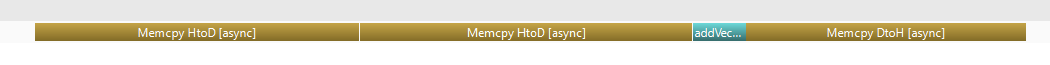

In [17]:
!/usr/local/cuda-10.1/bin/nvprof -o HW2_P2_3.nvvp -f ./HW2_P2 512 3

n =  16777217

==395== NVPROF is profiling process 395, command: ./HW2_P2 512 3
GPU name: Tesla K80
GPU compute capability: 3.7
Processing time of all device streams: 23.104544 ms

CORRECT :)
==395== Generated result file: /content/HW2_P2_3.nvvp


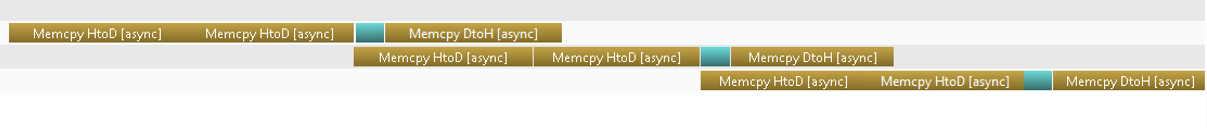